# Import Necessary Libraries

In [1]:
import pandas as pd
import os

# Task #1 Merge the 12 Months of Sales Data Into One Single File

In [2]:
inFiles = [file for file in os.listdir('E:\Data analyst\Dataset\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
allFile = pd.DataFrame()

for file in inFiles:
    df = pd.read_csv('E:/Data analyst/Dataset/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    allFile = pd.concat([allFile, df])


allFile.to_csv('E:/Data analyst/Dataset/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv', index = False)

# Read in Updated Dataframe

In [3]:
df = pd.read_csv(r'E:\Data analyst\Dataset\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean Up Data

In [4]:
df.isnull().sum()

Order ID            15260
Product             15260
Quantity Ordered    15260
Price Each          15260
Order Date          15260
Purchase Address    15260
dtype: int64

In [5]:
null_data = df[df.isnull().any(axis = 1)]
null_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5230126,NaN,NaN,NaN,NaN,NaN,NaN
5230388,NaN,NaN,NaN,NaN,NaN,NaN
5230992,NaN,NaN,NaN,NaN,NaN,NaN
5231498,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna(how = 'all')

##### Find 'or' in the month columns

In [7]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
#New df data

df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Convert data to correct data types

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Augment data with additional columns

#### Task 2 : Add month columns

In [10]:
df['Months'] = df['Order Date'].str[0:2]
df['Months'] = df['Months'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3 : Add sales columns

In [11]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Task 4 : Add city columns

In [12]:
# second method
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
df['City'] = df['Purchase Address'].apply(lambda x : get_city(x) + ' ' + get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Question 1: What was the best month for sales? How much was earned that month?

In [13]:
result = df.groupby('Months').sum()
result.head()

,Quantity Ordered,Price Each,Sales
Months,,,
1,305284,50729514.64,51023188.44
2,376572,61288772.16,61656627.76
3,476140,78153819.24,78598810.64
4,575624,94294788.56,94938766.72
5,522676,87783503.64,88272989.00


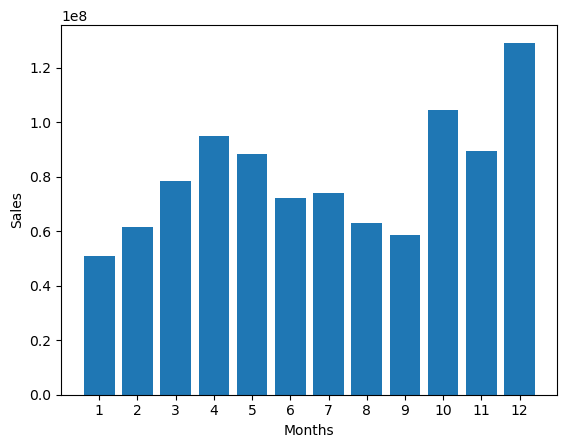

In [14]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

#### Question 2 : What city had the highest number of sales? =  SAN FRANCISCO

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [16]:
pd.options.display.float_format = '{:.1f}'.format
citySales = df.groupby('City').sum().sort_values(by = ['Sales'], ascending = False)
citySales

,Quantity Ordered,Price Each,Months,Sales
City,,,,
San Francisco CA,1406692,229920928.7,8834560,231341709.5
Los Angeles CA,932092,151800186.4,5833100,152671982.4
New York City NY,782096,129790383.2,4920748,130600888.0
Boston MA,630784,101847473.6,3951136,102525976.3
Atlanta GA,464856,77837429.6,2934232,78273960.2
Dallas TX,468440,77073579.0,2929360,77503311.2
Seattle WA,463484,76532288.3,2938348,76937153.4
Portland OR,316484,52095630.2,1977388,52380505.5
Austin TX,312284,50676461.1,1955212,50948289.0


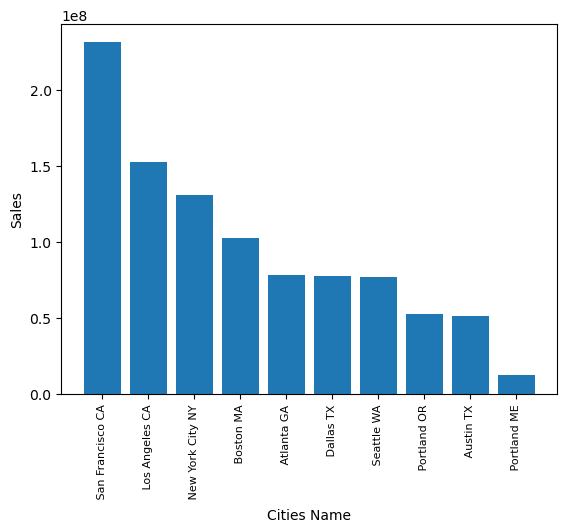

In [17]:
import matplotlib.pyplot as plt

plt.bar(citySales.index, citySales['Sales'])
plt.xticks(citySales.index, rotation = 'vertical', size = 8)
plt.xlabel('Cities Name')
plt.ylabel('Sales')
plt.show()

#### Question 3 : What time should we display advertisement to maximise likelihood of our customers buying product?

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [19]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.9,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,100.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.0,Boston MA,22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles CA,14,38
4,176560,Wired Headphones,1,12.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12.0,Los Angeles CA,14,38
5,176561,Wired Headphones,1,12.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12.0,Los Angeles CA,9,27


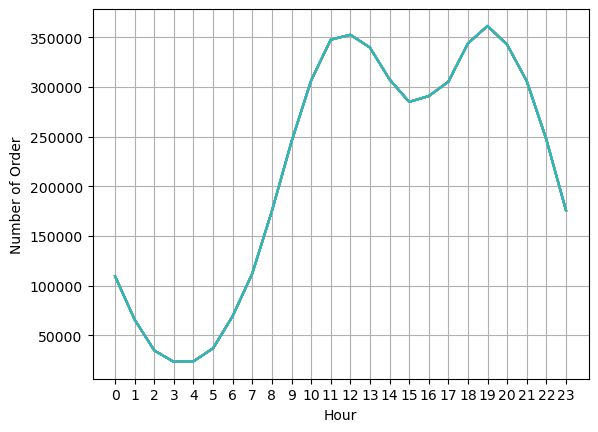

In [35]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Order')
plt.grid()
plt.show()

# My recomendation is around 11 am and 7 pm(19) we put our advertisement

## Question 4 : What products are most oftensold together?

In [22]:
duplicatedID = df[df['Order ID'].duplicated(keep=False)]
duplicatedID.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.9,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,100.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.0,Boston MA,22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles CA,14,38
4,176560,Wired Headphones,1,12.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12.0,Los Angeles CA,14,38
5,176561,Wired Headphones,1,12.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12.0,Los Angeles CA,9,27


In [23]:
duplicatedID['grouped'] = duplicatedID.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicatedID = duplicatedID[['Order ID', 'grouped']].drop_duplicates()

In [24]:
duplicatedID.head()

,Order ID,grouped
0,176558,"USB-C Charging Cable, USB-C Charging Cable, US..."
2,176559,"Bose SoundSport Headphones, Bose SoundSport He..."
3,176560,"Google Phone, Wired Headphones, Google Phone, ..."
5,176561,"Wired Headphones, Wired Headphones, Wired Head..."
6,176562,"USB-C Charging Cable, USB-C Charging Cable, US..."


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicatedID['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)



(' USB-C Charging Cable', ' USB-C Charging Cable') 7770980
(' Lightning Charging Cable', ' Lightning Charging Cable') 7680828
(' AAA Batteries (4-pack)', ' AAA Batteries (4-pack)') 7292565
(' AA Batteries (4-pack)', ' AA Batteries (4-pack)') 7259031
(' Wired Headphones', ' Wired Headphones') 6689764
(' Apple Airpods Headphones', ' Apple Airpods Headphones') 5493096
(' Bose SoundSport Headphones', ' Bose SoundSport Headphones') 4712553
(' 27in FHD Monitor', ' 27in FHD Monitor') 2645946
(' iPhone', ' iPhone') 2406294
(' 27in 4K Gaming Monitor', ' 27in 4K Gaming Monitor') 2193912


### Question 5: What product sold the most? Why do you think it sold the most?

In [26]:
product_ordered = df.groupby('Product')
quantity_ordered = product_ordered.sum()
quantity_ordered.head()

,Quantity Ordered,Price Each,Months,Sales,Hour,Minute
Product,,,,,,
20in Monitor,115612,12629931.7,821408,12716163.9,1645392,3423056
27in 4K Gaming Monitor,174832,68029855.6,1244320,68182731.7,2545648,5161268
27in FHD Monitor,211400,31527298.0,1471624,31707886.0,3011120,6158544
34in Ultrawide Monitor,173572,65764109.3,1212512,65955624.3,2494128,5137440
AA Batteries (4-pack),773780,2212439.0,4075624,2971315.2,8353576,17053092


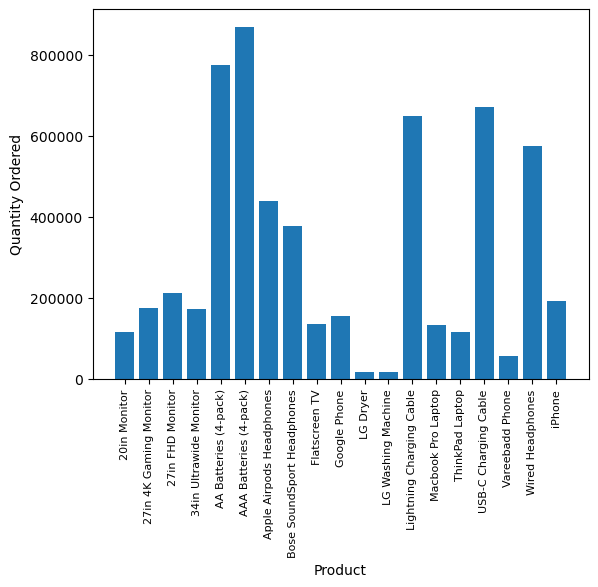

In [28]:
plt.bar(quantity_ordered.index, quantity_ordered['Quantity Ordered'])
plt.xticks(quantity_ordered.index, rotation = 'vertical', size = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\andifarhan\AppData\Local\Temp\ipykernel_5928\2451377243.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity_ordered.index, rotation = 'vertical', size = 8)


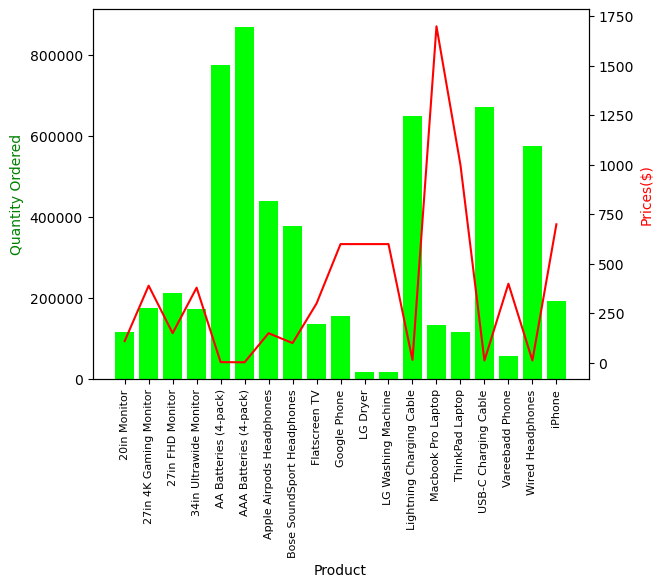

In [57]:
import numpy as np

prices = df.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(quantity_ordered.index, quantity_ordered['Quantity Ordered'], color = 'lime')
ax2.plot(quantity_ordered.index, prices, 'red')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices($)', color='r')
ax1.set_xticklabels(quantity_ordered.index, rotation = 'vertical', size = 8)

plt.show()
